# Análisis de negocio #

### El análisis de este para este proyecto se basará en ayudar a la mepresa Showz a optimizar los gastos de marketing, respondiendo a las siguentes preguntas:

1. ¿Cómo los clientes usan el servicio?
2. ¿Cúando empiezan a comprar?
3. ¿Cúanto dinero aporta cada cliente a la compañía?
4. ¿Cúando los ingresos cubren el costo de adquisición de los clientes? 

### 1. Cargamos los datos y los preparamos para su análisis.

In [98]:
#importaciónd de librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Carga de dataset

visits = pd.read_csv('visits_log_us.csv')
orders= pd.read_csv('orders_log_us.csv')
costs= pd.read_csv('costs_us.csv')

In [4]:
#Análisis de la calidad de los datos para visits

visits['End Ts']= pd.to_datetime(visits['End Ts'])
visits['Start Ts']= pd.to_datetime(visits['Start Ts'])
print(visits.info())
print(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None
    Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  

In [5]:
#Análisis de la calidad de los datos para orders

orders['Buy Ts']= pd.to_datetime(orders['Buy Ts'])

print(orders.info())
print(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
               Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450


In [6]:
#Análisis de la calidad de los datos para costs

costs['dt']= pd.to_datetime(costs['dt'])

print(costs.info())
print(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None
   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08


### 2. Realizaremos métricas para analizar las visitas.

2.1 ¿Cuantas personas lo usan cada día, semana y mes?

In [7]:
#Complementamos la tabal seccionando la fecha para realizar análisis por día, semana y mes
visits['visit_year']= visits['Start Ts'].dt.isocalendar().year
visits['visit_week'] = visits['Start Ts'].dt.isocalendar().week
visits['visit_month'] = visits['Start Ts'].dt.month
visits['visit_daily'] = visits['Start Ts']. dt.date

visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid,visit_year,visit_week,visit_month,visit_daily
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,51,12,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,8,2,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,26,7,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,20,5,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,52,12,2017-12-27
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,35,9,2017-09-03
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,5,1,2018-01-30
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,44,11,2017-11-05
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017,29,7,2017-07-19
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017,45,11,2017-11-08


In [8]:
#Agrupamos por día, semana, mes y contamos los usuarios para sacar el promedio de usuarios que usan el servicio
visits_per_month= visits.groupby('visit_month').agg({'Uid': 'nunique'}).mean().round(2)
visits_per_week= visits.groupby('visit_week').agg({'Uid': 'nunique'}).mean().round(2)
visits_daily=  visits.groupby('visit_daily').agg({'Uid':'nunique'}).mean().round(2)

#Cremos un nuevo dataframe para visualizar los resultados
visits_per_user = pd.DataFrame({
    'Visits': ['visits_daily','avisits_week', 'visits_month' ],
    'Avg_per_User':[visits_daily['Uid'], visits_per_week['Uid'], visits_per_month['Uid']]
})

visits_per_user

,Visits,Avg_per_User
0,visits_daily,907.99
1,avisits_week,5825.29
2,visits_month,23228.42


2.2 ¿Cuántas sesiones hay por día?

In [9]:
#Contamos los valores unicos en la columna Start Ts la cual nos indica el inicio de una sesión
n_sessions = visits['Start Ts'].nunique()
print(n_sessions)

224303


2.3 ¿Cuál es la duración de cada sesión?

In [10]:
#Restamos el inicio y el fin de la sesión para determinar su duración
visits['session_duration']= (visits['End Ts'] - visits['Start Ts']).dt.seconds
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,visit_year,visit_week,visit_month,visit_daily,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,51,12,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,8,2,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,26,7,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,20,5,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,52,12,2017-12-27,0


643.51


<Axes: >

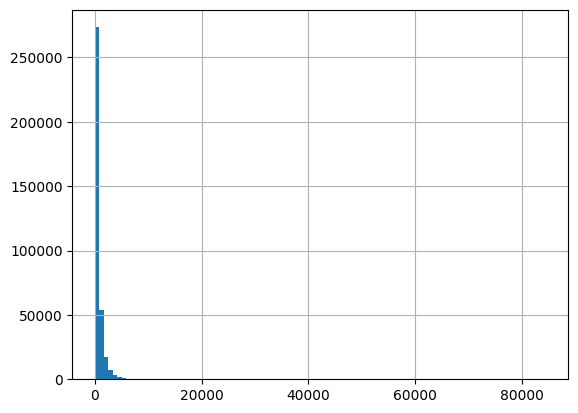

In [11]:
#Calculamos el promedio de la duración de las sesiones e imprimimos un histograma para visualizarlo 
visits['session_duration']= (visits['End Ts'] - visits['Start Ts']).dt.seconds
print(visits['session_duration'].mean().round(2))
visits['session_duration'].hist(bins= 100)


2.4 ¿Con qué frecuencia los usuarios regresan?

In [12]:
#Calculamos el MAU
total_mau= visits.groupby(['visit_year', 'visit_month']).agg({'Uid':'nunique'}).mean().round(2)
#Calculamos el DAU
total_dau= visits.groupby('visit_daily').agg({'Uid':'nunique'}).mean().round(2)
#Calculamos el WAU
total_wau= visits.groupby(['visit_year', 'visit_week']).agg({'Uid':'nunique'}).mean().round(2)

#Calculamos los factores de aderencia semanal y mensual
sticky_mau= (total_dau / total_mau) * 100

sticky_wau= (total_dau/ total_wau) *100


print(sticky_wau)
print(sticky_mau)

Uid    15.884365
dtype: float64
Uid    3.908962
dtype: float64


De acuerdo con los factotres de aderencia podemos concluir que el 15% de nuestros usuarios regresan de manera semanal y sólo el 4% lo hace de manera mensual lo cual no indica que el servicio se sule usar más, semanalmente

### 3. Análisis de las ventas.

3.1 ¿Cuándo empieza la gente a comprar?

In [13]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

time_to_conv= pd.merge(visits, orders, on='Uid')


first_reg= time_to_conv.groupby('Uid').agg(
    first_session=('Start Ts', 'min'),
     first_order= ('Buy Ts', 'min')
      ).reset_index()


first_reg['time_to_buy'] = first_reg['first_order'] - first_reg['first_session'] 
first_reg['days_to_buy'] = first_reg['time_to_buy'].dt.days




print(first_reg['days_to_buy'].mean().round(2))


16.73


Notamos que en promedio los uisuarios comienzan a comprar a los 16 días despues de su priemera interacción con la página

3.2 ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [23]:
#Convertimos columna Buy Ts a datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

#Creación de cohortes
#1. Encontrar la primera compra agripando por Uid y encontramos la fecha minima con .min()
orders['first_order']= orders.groupby('Uid')['Buy Ts'].transform('min').dt.to_period('M')
orders['Buy_period']= orders['Buy Ts'].dt.to_period('M')

#2. Calculamos el tiempo de vida de las cohortes
orders['cohort_period']= (orders['Buy_period'] - orders['first_order']).apply(lambda x: x.n)

#3. Contamos los pedidos por cohorte
orders_count= orders.groupby(['first_order', 'cohort_period']).size().reset_index(name='order_count')

#4. Creamos tabla dinámica para una mejor visualización
orders_count_result= orders_count.pivot_table(
    index= 'first_order',
    columns= 'cohort_period',
    values= 'order_count'
)



orders_count_result

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,NaN
2017-08,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,NaN,NaN
2017-09,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,NaN,NaN,NaN
2017-10,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,NaN,NaN,NaN,NaN
2017-11,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,NaN,NaN,NaN,NaN,NaN
2017-12,5052.0,270.0,202.0,179.0,86.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,3783.0,224.0,159.0,64.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4095.0,222.0,83.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos notar que al inicio los pedidos son generosos pero al paso del tiempo estos caen abruptamente.

3.3 ¿Cuál es el tamaño promedio de compra?


In [25]:
#Sumaremos la cantidad total de los ingresos y contaremos el total de pedidos registrados

total_revenue= orders['Revenue'].sum()
total_orders= len(orders)

avg_revenue_size = total_revenue / total_orders

print(f'El tamaño promedio de las compras es de ${avg_revenue_size:.2f}')

El tamaño promedio de las compras es de $5.00


3.4 ¿Cuánto dinero traen? (LTV)

In [28]:
#Calculamos el LTV por cada cliente agrupando Uid y sumando el revenue

revenue_per_coustumer= orders.groupby('Uid')['Revenue'].sum()
avg_per_coustumer= revenue_per_coustumer.mean()
print(f'El LTV promedio es de ${avg_per_coustumer:.2f}')

El LTV promedio es de $6.90


### 4. Análisis de Marketing

4.1 ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [40]:
#Convertimos el tipo de fecha chorrecto
costs['dt']= pd.to_datetime(costs['dt'])
#Calculamos el total del costo de adquisición
total_spent = costs['costs'].sum()
#Calculamos el costo por cada una de las fuentes
total_spent_per_font= costs.groupby('source_id')['costs'].sum()
#Calcularemos los costos por periodo mensual
costs['Month']= costs['dt'].dt.to_period('M')
monthly_spent= costs.groupby('Month')['costs'].sum()
#Calculamos los costos por año
costs['year']= costs['dt'].dt.to_period('Y')
year_spent= costs.groupby('year')['costs'].sum()

print(f'El costo total de adquisición es de ${total_spent:.2f}')
print(total_spent_per_font)
print('\nGasto total por mes:')
print(monthly_spent)
print('\nGasto total por año:')
print(year_spent)


El costo total de adquisición es de $329131.62
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

Gasto total por mes:
Month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64

Gasto total por año:
year
2017    187961.15
2018    141170.47
Freq: Y-DEC, Name: costs, dtype: float64


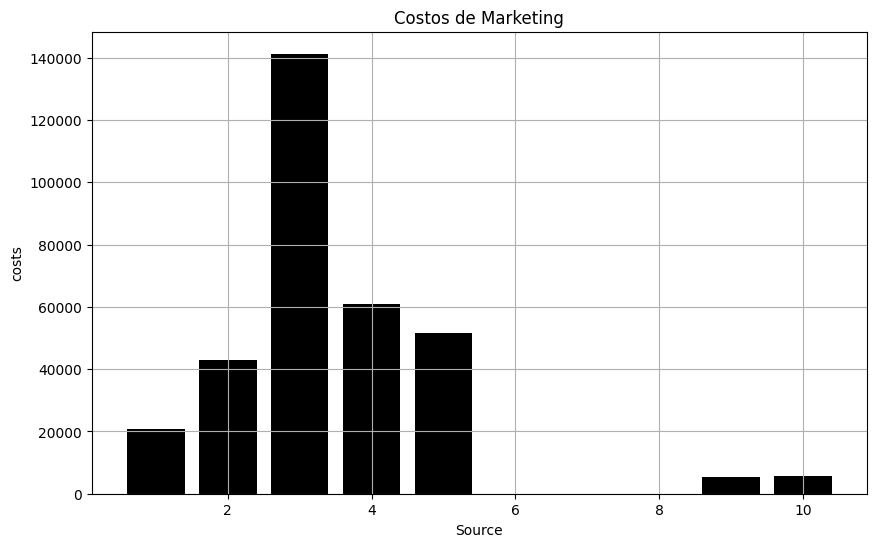

In [69]:
total_spent_per_font= costs.groupby('source_id')['costs'].sum().reset_index()

plt.figure(figsize= (10, 6))
plt.bar(total_spent_per_font['source_id'], total_spent_per_font['costs'], color='black')
plt.title('Costos de Marketing')
plt.xlabel('Source')
plt.ylabel('costs')
plt.grid(True)
plt.show()

Notamos que la fuente número 3 es la que más ha gastado en adquisicion de clientes, el mes de diciembre fue al que mas presupuesto se le dió para adquisicion de clientes y el año en el que más se invirtio fue el 2017

4.2 ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [61]:
#Calculamos el costo por cada una de las fuentes
total_spent_by_source= costs.groupby('source_id')['costs'].sum().reset_index()
#Sacamos la primer fecha en la que el cliente se registro
first_visit= visits.loc[visits.groupby('Uid')['Start Ts'].idxmin()]
#Contamos lo clientes que ingresaron por primera vez y los agrupamos por cada fuente
coustumer_by_source= first_visit.groupby('Source Id')['Uid'].nunique().reset_index(name='coustumers_acquired')
#Tenemos la columna Source_id escritas de diferente forma, las homologaremos para poder unir las tablas
coustumer_by_source= coustumer_by_source.rename(columns={'Source Id': 'source_id'})
#Uniremos las tablas de costos con los usuarios por fuente 
cac_per_coustumer= pd.merge(total_spent_by_source, coustumer_by_source, on= 'source_id', how= 'left')
#Calculamos el CAC
cac_per_coustumer['CAC'] = cac_per_coustumer['costs'] / cac_per_coustumer['coustumers_acquired']

print('El costo por adquisicion de clientes por cada fuente es de:')
print(cac_per_coustumer)




El costo por adquisicion de clientes por cada fuente es de:
   source_id      costs  coustumers_acquired       CAC
0          1   20833.27                 9469  2.200155
1          2   42806.04                17616  2.429952
2          3  141321.63                66116  2.137480
3          4   61073.60                72346  0.844188
4          5   51757.10                49237  1.051183
5          9    5517.49                 6448  0.855690
6         10    5822.49                 6903  0.843472


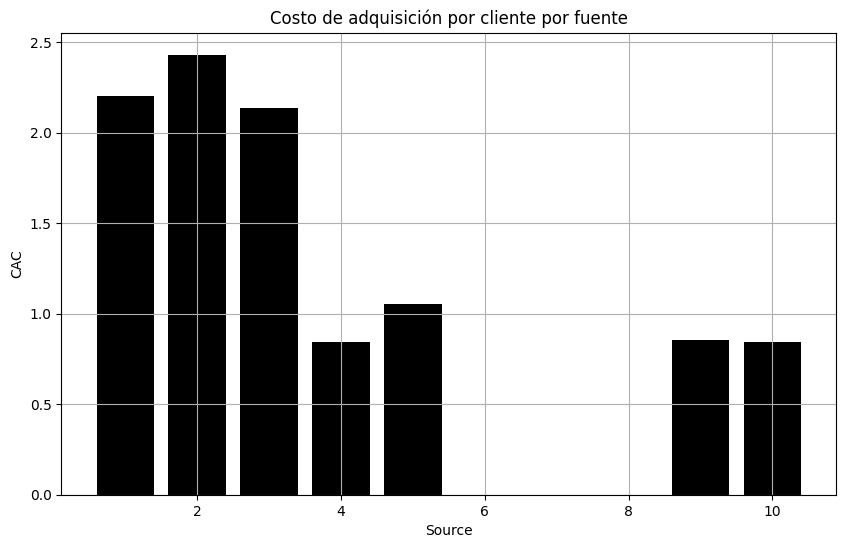

In [71]:
plt.figure(figsize=(10,6))
plt.bar(cac_per_coustumer['source_id'], cac_per_coustumer['CAC'], color= 'black')
plt.title('Costo de adquisición por cliente por fuente')
plt.xlabel('Source')
plt.ylabel('CAC')
plt.grid(True)
plt.show()

Notamos que la fuente número 2 fue la que tuvo un costo por cliente más elevado pero no fue la que atrajo a más clientes nuevos, por el contrario la fuente cuatro tuvo un menor costo y atrajo a más usuarios

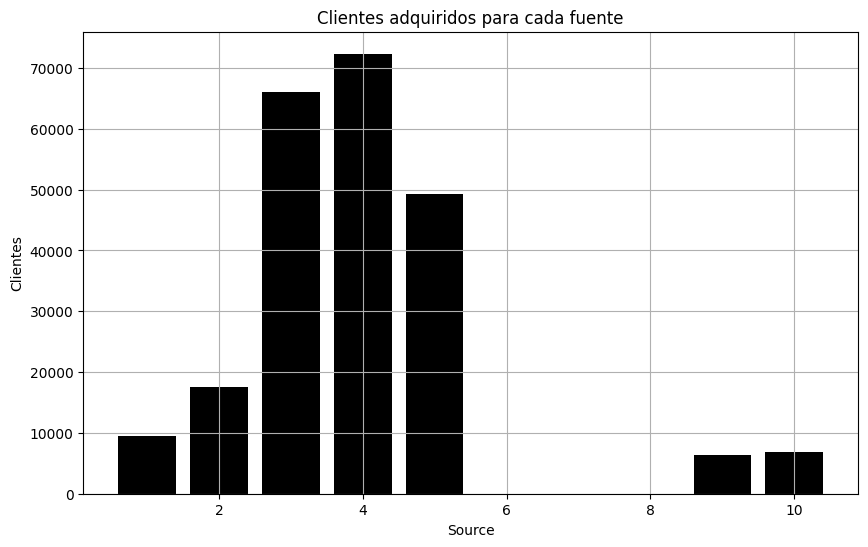

In [73]:
plt.figure(figsize=(10,6))
plt.bar(cac_per_coustumer['source_id'], cac_per_coustumer['coustumers_acquired'], color= 'black')
plt.title('Clientes adquiridos para cada fuente')
plt.xlabel('Source')
plt.ylabel('Clientes')
plt.grid(True)
plt.show()

Como lo vimos en el análisis anterior la fuente 4 fue la que más atrajo a clientes nuevos no así las fuentes 9 y 10 pero creo que se debe a que no son periodos completos

Compararemos los ingresos que nos trae cada cliente (LTV) contra lo que nos cuesta atraerlos (CAC)

In [76]:
ltv_by_source= pd.merge(first_visit, revenue_per_coustumer, on= 'Uid', how='left')
ltv_by_source_avg= ltv_by_source.groupby('Source Id')['Revenue'].mean().reset_index()
ltv_by_source_avg= ltv_by_source_avg.rename(columns={'Source Id': 'source_id', 'Revenue': 'LTV'})

ltv_cac= pd.merge(ltv_by_source_avg, cac_per_coustumer, on='source_id', how='left')

ltv_cac

,source_id,LTV,costs,coustumers_acquired,CAC
0,1,10.724577,20833.27,9469.0,2.200155
1,2,13.383802,42806.04,17616.0,2.429952
2,3,5.204931,141321.63,66116.0,2.137480
3,4,5.506685,61073.60,72346.0,0.844188
4,5,7.592558,51757.10,49237.0,1.051183
5,6,NaN,NaN,NaN,NaN
6,7,1.220000,NaN,NaN,NaN
7,9,5.293566,5517.49,6448.0,0.855690
8,10,3.348631,5822.49,6903.0,0.843472


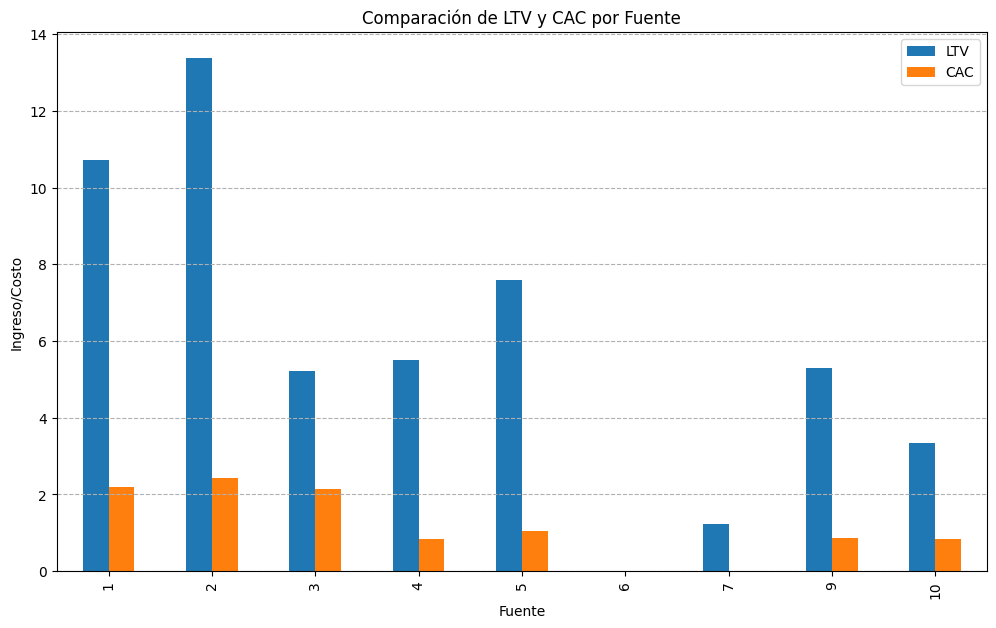

In [78]:
ltv_cac.plot(x='source_id', y=['LTV', 'CAC'], kind='bar', figsize=(12, 7))
plt.title('Comparación de LTV y CAC por Fuente')
plt.xlabel('Fuente')
plt.ylabel('Ingreso/Costo')
plt.grid(axis='y', linestyle='--')
plt.show()

Notamos que el negocio es rentable ya que los ingresos por clientes en cada una de las fuentes son mayores a lo que se invirtio para atraerlos

4.3 ¿Cuán rentables eran las inversiones? (ROMI)

In [103]:
#Unimos las tablas order y visits para realizar los calculos
orders_by_source= pd.merge(orders, visits, on= 'Uid', how='left')
#Encontramos la primera fecha de registro del cliente y sumamos los ingresos
first_visit= orders_by_source.loc[orders_by_source.groupby('Uid')['Buy Ts'].idxmin()]
ltv_per_coustumer= orders_by_source.groupby('Uid')['Revenue'].sum().reset_index()
#unimos las consultas anteriores ltv con nuestro tabla first_visits, agrupamos las fuentes y sumamos ingresos
coustumer_ltv_source= pd.merge(ltv_by_source, first_visit, on='Uid', how='left')
total_revenue_by_source= coustumer_ltv_source.groupby('Source Id_x')['Revenue_x'].sum().reset_index()
total_revenue_by_source= total_revenue_by_source.rename(columns={'Source Id_x': 'source_id', 'Revenue_x':'revenue'})
#calculamos el ROMI
romi_data= pd.merge(total_revenue_by_source, total_spent_by_source, on='source_id', how='left')
romi_data['ROMI']= (romi_data['revenue'] - romi_data['costs']) / romi_data['costs']
romi_data['profitable']= np.where(romi_data['ROMI'] > 0, 'Positive', 'Negative')

romi_data


,source_id,revenue,costs,ROMI,profitable
0,1,31090.55,20833.27,0.492351,Positive
1,2,46923.61,42806.04,0.096191,Positive
2,3,54511.24,141321.63,-0.614275,Negative
3,4,56696.83,61073.60,-0.071664,Negative
4,5,52624.02,51757.10,0.016750,Positive
5,6,0.00,NaN,NaN,Negative
6,7,1.22,NaN,NaN,Negative
7,9,5759.40,5517.49,0.043844,Positive
8,10,4450.33,5822.49,-0.235665,Negative


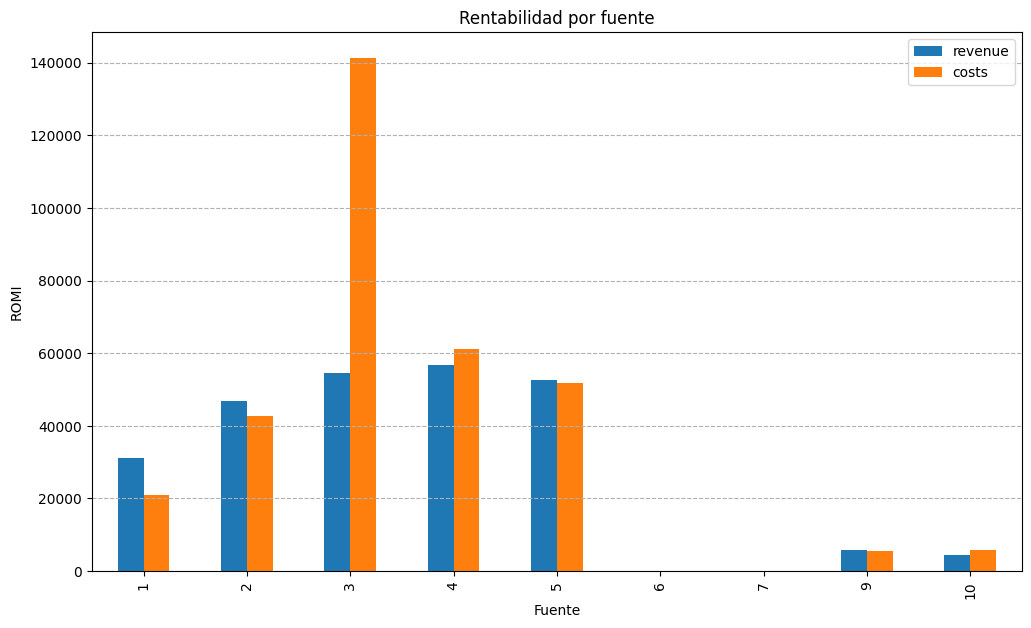

In [106]:
romi_data.plot(x='source_id', y=['revenue', 'costs'], kind='bar', figsize=(12, 7))
plt.title('Rentabilidad por fuente')
plt.xlabel('Fuente')
plt.ylabel('ROMI')
plt.grid(axis='y', linestyle='--')
plt.show()

Podemos notar que las fuentes no han sido tan rentables para el negocio, algunas son positivas y otras no, en especial la 3 que sin duda costo más de lo que generó.

### 5 Concluciones

En general el análisis de las métricas, como el Costo de Adquisición de Clientes (CAC) y el Valor de Vida del Cliente (LTV), revela que, en promedio, el negocio está en una posición saludable. El LTV promedio de los clientes es superior al CAC promedio, lo que indica que cada cliente adquirido genera más ingresos a lo largo de su vida de lo que costó atraerlo.

Recomendaciones:

1. Aumentar la Inversión: Aumentar el gasto en las fuentes de adquisición con el ROMI más alto, permitirá escalar las fuentes que ya han demostrado ser exitosas.

2. Investigar y Optimizar: Analizar las fuentes con ROMI negativo, y averiguar si se puede reducir el costo o mejorar el rendimiento para que sean rentables o considera pausar o eliminar la inversión en ellas.

3. Monitoreo Continuo: Monitorear el ROMI y el LTV/CAC de forma regular para asegurar que las decisiones de marketing siempre estén alineadas con los objetivos de rentabilidad.